In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = np.load("/content/drive/MyDrive/AI/Assessment1/sprites_greyscale10.npz")
train_X = data["train_X"]
train_Y = data["train_Y"]
test_X = data["test_X"]
test_Y = data["test_Y"]

In [3]:
uni_train_Y = np.unique(train_Y)
print(uni_train_Y)

['halfling' 'human' 'lizard' 'orc']


**Extract subset**

In [4]:
class_select = ['halfling', 'human']
train_X_subset = train_X[np.isin(train_Y, class_select)]
train_Y_subset = train_Y[np.isin(train_Y, class_select)]
test_X_subset = test_X[np.isin(test_Y, class_select)]
test_Y_subset = test_Y[np.isin(test_Y, class_select)]

print(np.unique(train_Y_subset))
print(np.unique(test_Y_subset))

train_Y_subset = (train_Y_subset == 'halfling').astype(int)
test_Y_subset = (test_Y_subset == 'halfling').astype(int)

print(train_Y_subset)
print(test_Y_subset)

['halfling' 'human']
['halfling' 'human']
[0 1 1 ... 1 0 1]
[1 0 1 ... 0 1 0]


In [5]:
from sklearn import tree, neighbors
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

**Decision tree**

**Find the best node**

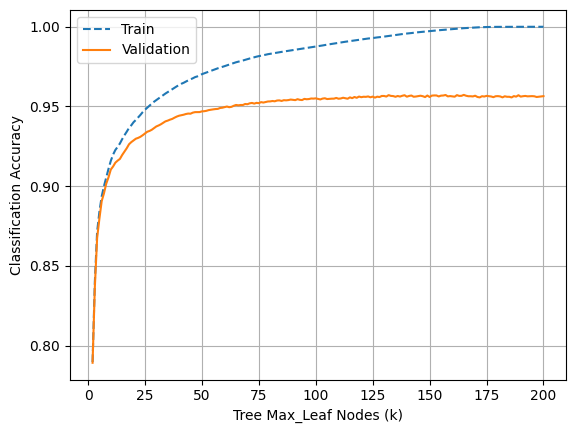

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The best node:165
The best Accuracy:0.9572688341140747


In [8]:
RUNS = 50
P_CV = 0.2
MAX_LEAF = 200

DT_accs_train = np.zeros([RUNS, MAX_LEAF-1], dtype=np.float32)
DT_accs_val = np.zeros([RUNS, MAX_LEAF-1], dtype=np.float32)

MAX_LEAF_RANGE = range(2, MAX_LEAF+1)

for i in range(RUNS):

  data_train_CV, data_val_CV, labels_train_CV, labels_val_CV = train_test_split(
        train_X_subset, train_Y_subset, test_size=P_CV, random_state=i)

  for j in MAX_LEAF_RANGE:

    clf = tree.DecisionTreeClassifier(max_leaf_nodes=j, random_state=j)
    clf.fit(data_train_CV, labels_train_CV)

    DT_predictions_train = clf.predict(data_train_CV)
    DT_accs_train[i, j-2]= accuracy_score(labels_train_CV, DT_predictions_train)

    DT_predictions_val = clf.predict(data_val_CV)
    DT_accs_val[i, j-2] = accuracy_score(labels_val_CV, DT_predictions_val)

plt.figure()
plt.plot(MAX_LEAF_RANGE, DT_accs_train.mean(axis=0), label='Train', linestyle="dashed")
plt.plot(MAX_LEAF_RANGE, DT_accs_val.mean(axis=0), label='Validation', linestyle="solid")
plt.xlabel('Tree Max_Leaf Nodes (k)')
plt.ylabel('Classification Accuracy')
plt.grid()
plt.legend()
plt.savefig("DT.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("DT.pdf")

best_index = np.argmax(DT_accs_val.mean(axis=0))
best_node = MAX_LEAF_RANGE[best_index]
best_DT_accs_val = DT_accs_val.mean(axis=0)[best_index]
print(f"The best node:{best_node}")
print(f"The best Accuracy:{best_DT_accs_val}")

In [11]:
plt.figure(figsize=(100, 80))
final_clf = tree.DecisionTreeClassifier(max_leaf_nodes=best_node)
final_clf.fit(train_X_subset, train_Y_subset)

final_DT_predictions = final_clf.predict(test_X_subset)
final_DT_accuracy = accuracy_score(test_Y_subset, final_DT_predictions)

print(f"Final DT acc with best node =({best_node}): {final_DT_accuracy:.4f}")

tree.plot_tree(final_clf, feature_names=None,
               class_names=['human', 'halfling'],
               filled=True, fontsize=10)
plt.title(f'Final decision tree with {best_node} leaf nodes')
plt.autoscale()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**KNN**

**Find the best N**

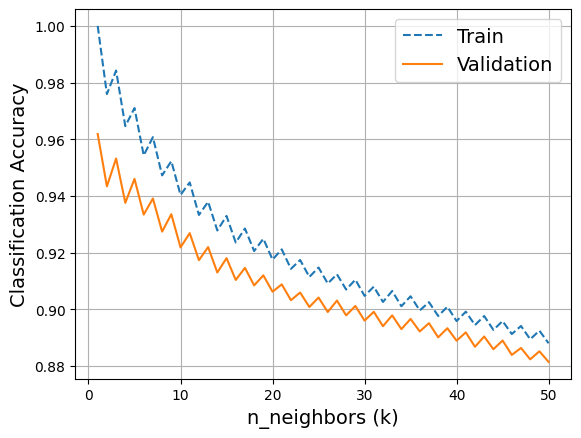

The best N:1
The best Accuracy:0.9618659019470215


In [12]:
from sklearn.neighbors import KNeighborsClassifier
RUNS = 50
MAX_N_NEIGHBORS = 50

KNN_accs_train = np.zeros([RUNS, MAX_N_NEIGHBORS], dtype=np.float32)
KNN_accs_val = np.zeros([RUNS, MAX_N_NEIGHBORS], dtype=np.float32)

MAX_N_NEIGHBORS_RANGE = range(1, MAX_N_NEIGHBORS+1)

for i in range(RUNS):

  data_train_CV, data_val_CV, labels_train_CV, labels_val_CV = train_test_split(
        train_X_subset, train_Y_subset, test_size=P_CV, random_state=i)

  for j in MAX_N_NEIGHBORS_RANGE:

    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(data_train_CV, labels_train_CV)

    KNN_predictions_train = knn.predict(data_train_CV)
    KNN_accs_train[i, j-1] = accuracy_score(labels_train_CV, KNN_predictions_train)

    KNN_predictions_val = knn.predict(data_val_CV)
    KNN_accs_val[i, j-1] = accuracy_score(labels_val_CV, KNN_predictions_val)

plt.figure()
plt.plot(MAX_N_NEIGHBORS_RANGE, KNN_accs_train.mean(axis=0), label='Train', linestyle="dashed")
plt.plot(MAX_N_NEIGHBORS_RANGE, KNN_accs_val.mean(axis=0), label='Validation', linestyle="solid")
plt.xlabel('n_neighbors (k)', fontsize=14)
plt.ylabel('Classification Accuracy', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.savefig("knn.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("knn.pdf")

best_KNN_index = np.argmax(KNN_accs_val.mean(axis=0))
best_N_NEIGHBOR = MAX_N_NEIGHBORS_RANGE[best_KNN_index]
best_KNN_accs_val = KNN_accs_val.mean(axis=0)[best_KNN_index]

print(f"The best N:{best_N_NEIGHBOR}")
print(f"The best Accuracy:{best_KNN_accs_val}")

In [14]:
final_knn = KNeighborsClassifier(n_neighbors=best_N_NEIGHBOR)
final_knn.fit(train_X_subset, train_Y_subset)

final_KNN_predictions = final_knn.predict(test_X_subset)
final_KNN_accuracy = accuracy_score(test_Y_subset, final_KNN_predictions)

print(f"Final KNN acc with best N =({best_N_NEIGHBOR}): {final_KNN_accuracy:.4f}")

Final KNN acc with best N =(1): 0.9452


**Logistic Regression**

**Find the best C**

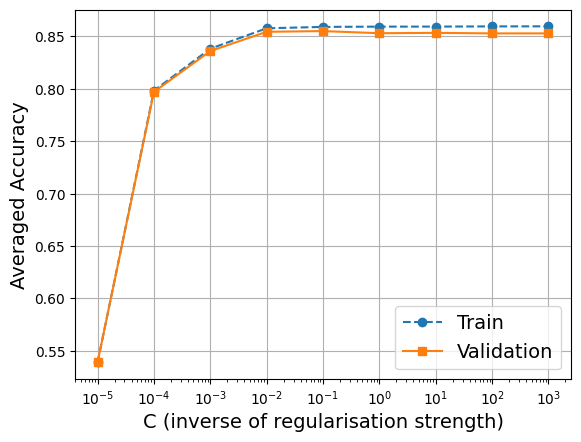

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The best C:1000.0
The best Accuracy:[0.85411366 0.86089907 0.84889643 0.84380306 0.8565365 ]


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

C_choices = np.logspace(-5, 3, 9)

Log_acc_train = np.zeros((len(C_choices), 5))
Log_acc_val = np.zeros((len(C_choices), 5))

kf = KFold(n_splits=5)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X_subset)
test_X_scaled = scaler.transform(test_X_subset)

for i, (train_index, test_index) in enumerate(kf.split(train_X_scaled)):

  X_train_fold = train_X_scaled[train_index]
  y_train_fold = train_Y_subset[train_index]
  X_val_fold = train_X_scaled[test_index]
  y_val_fold = train_Y_subset[test_index]

  for j in range(len(C_choices)):

    C = C_choices[j]

    model = LogisticRegression(penalty='l2')
    model.C = C
    model.fit(X_train_fold, y_train_fold)

    y_train_pred = model.predict(X_train_fold)
    y_val_pred = model.predict(X_val_fold)

    cm_Log_train = confusion_matrix(y_train_fold, y_train_pred)
    cm_Log_val = confusion_matrix(y_val_fold, y_val_pred)

    Log_acc_train[j, i] = np.diag(cm_Log_train).sum()/cm_Log_train.sum()
    Log_acc_val[j, i] = np.diag(cm_Log_val).sum()/cm_Log_val.sum()

Log_acc_train_avg = Log_acc_train.mean(axis=1)
Log_acc_val_avg = Log_acc_val.mean(axis=1)

plt.figure()
plt.semilogx(C_choices, Log_acc_train_avg, label="Train", marker='o', linestyle="dashed")
plt.semilogx(C_choices, Log_acc_val_avg, label="Validation", marker='s', linestyle="solid")
plt.xlabel("C (inverse of regularisation strength)", fontsize=14)
plt.ylabel("Averaged Accuracy", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.savefig("Log.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("Log.pdf")

best_C_index = np.argmax(Log_acc_train_avg)
best_C = C_choices[best_C_index]
best_C_accs_val = Log_acc_val[best_C_index]
print(f"The best C:{best_C}")
print(f"The best Accuracy:{best_C_accs_val}")

In [20]:
final_Log_model = LogisticRegression()
final_Log_model.C = best_C
final_Log_model.fit(train_X_scaled, train_Y_subset)

final_Log_predictions = final_Log_model.predict(test_X_scaled)

cm_Log_val = confusion_matrix(test_Y_subset, final_Log_predictions)

final_Log_accuracy = np.diag(cm_Log_val).sum()/cm_Log_val.sum()
print(f"Final Log acc with best C =({best_C}): {final_Log_accuracy:.4f}")

Final Log acc with best C =(1000.0): 0.8939
